In [1]:
from friendsfamilytest.params import *
from friendsfamilytest.sheethelper import *
from friendsfamilytest.data import *
from friendsfamilytest.utils import *

import pandas as pd 
import seaborn as sns

from wordcloud import WordCloud
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_formats='retina'

In [2]:
data = load_google_sheet()

[F] FUCTION: load_google_sheet()
[✔️] Completed: load_google_sheet() - Time taken: 3.41 seconds


In [3]:
data.head()

,time,rating,free_text,do_better
0,2023-07-13 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",Keep it up
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,
2,2023-07-13 15:29:21,Extremely likely,The doctor was very understanding and very kno...,No. It was the best.
3,2023-07-13 15:30:10,Extremely likely,Dr E was extremely nice,the receptionist was very unkind
4,2023-07-13 15:31:48,Extremely likely,I was spoken to politely on the phone and a te...,No. I was happy with everything.


In [4]:
data['free_text_len'] = data['free_text'].str.split().apply(len)
data['do_better_len'] = data['do_better'].str.split().apply(len)

In [5]:
data.head()

,time,rating,free_text,do_better,free_text_len,do_better_len
0,2023-07-13 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",Keep it up,13,3
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,,4,0
2,2023-07-13 15:29:21,Extremely likely,The doctor was very understanding and very kno...,No. It was the best.,8,5
3,2023-07-13 15:30:10,Extremely likely,Dr E was extremely nice,the receptionist was very unkind,5,5
4,2023-07-13 15:31:48,Extremely likely,I was spoken to politely on the phone and a te...,No. I was happy with everything.,44,6


<Axes: xlabel='free_text_len', ylabel='Count'>

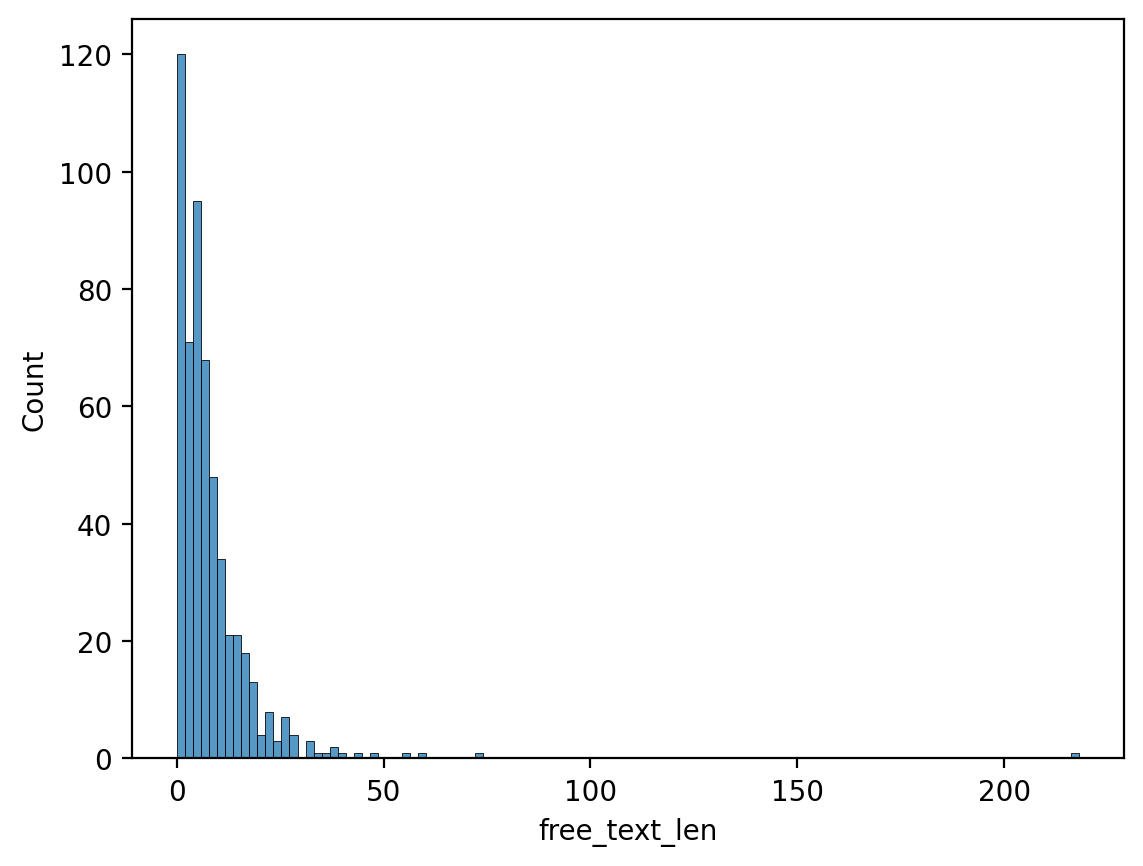

In [23]:
import seaborn as sns
sns.histplot(data=data, x='free_text_len')

<Axes: xlabel='do_better_len', ylabel='Count'>

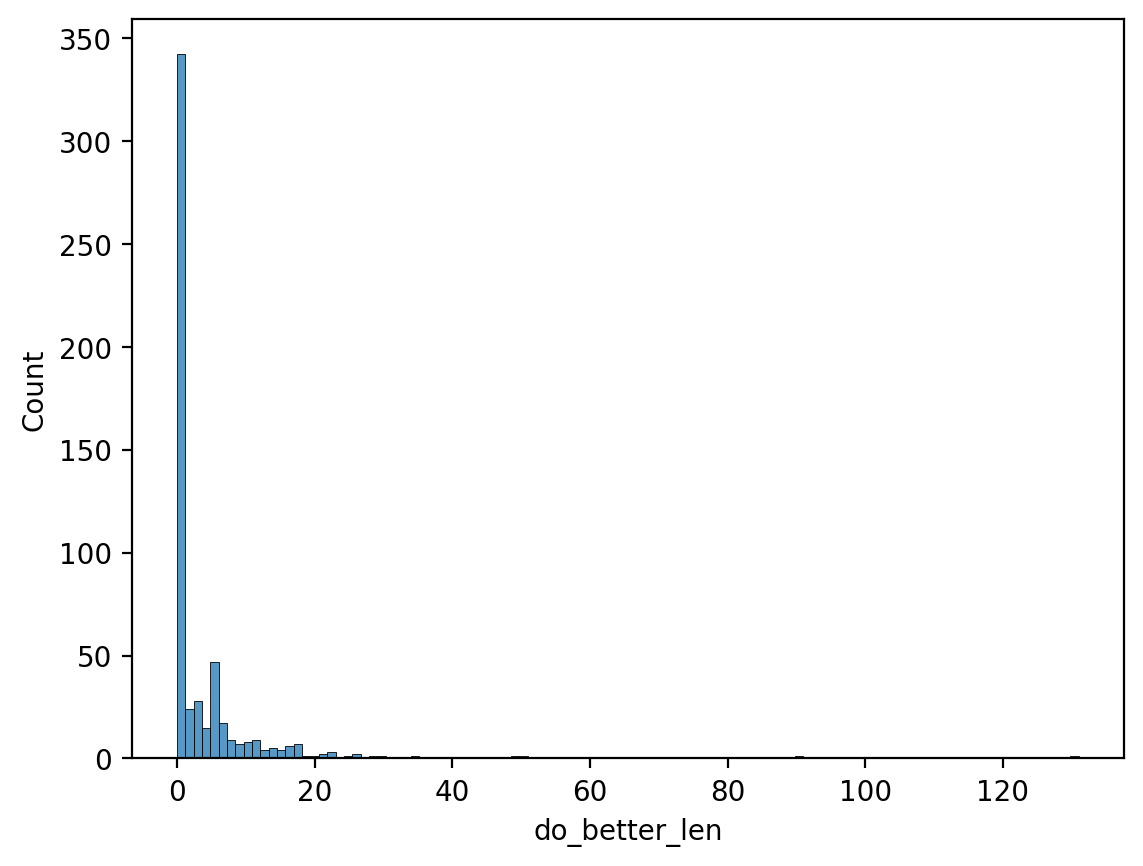

In [24]:
sns.histplot(data=data, x='do_better_len')

In [11]:
for text in data['do_better']:
    print(text)



no it was the best
the receptionist was very unkind
no i was happy with everything

no it is already perfect



i think it is getting better the ladies at the reception can be so rude it would not do any harm to smile be friendly put the patient at ease
the basement is a bit dark and gloomy and reception area could also do with an upgrade


earls court surgery is really lucky to have nurse alex


yes of course she showed me the easy and a great way to apply for my medicine


everything was done professionally
the staff and especially the gp are very good in service







everything  fine

can’t think of anything
yes they didnt have my xray for my arm  a waste off time for me there




sendn me to specialistthe best
more knowledge newly qualified doctors  enthusiastic



nothing i can think about







more doctors in the surgery

everything is good







every body enjoying to work 
i can feel it
more face to face appointment with the doctors
can’t think of anythink

doctor and al

In [23]:
remove_list = []
for text in data['do_better']:
    if text == '':
        pass
    elif len(text) < 12 and len(text) > 1:
        remove_list.append(text)
        
print(remove_list)

['Keep it up', 'No', 'No', 'No', 'No answer ', 'wait time', 'No', 'Yes ', 'No', 'No. Fine ', 'No', 'No', 'No', 'Not really\n', 'No', 'None', 'No nothinh', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'None', 'No', 'Not really ', 'NO', 'Nothings ', 'No', 'No', 'Nothing ', 'No', 'No', 'No', 'All good', 'Reminder', 'No', 'N/A', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No ', 'No really ', 'No. ', 'No', 'All good', 'None', 'No', 'No', 'No :)', 'Nothing', 'Not at all', 'No', 'Excellent ', 'No', 'No', 'No', 'No', 'Thanks ', 'No', 'No', 'Not really ', 'No', 'NO.', 'None ', 'No', 'No', 'No ', 'None', 'Thank you 😊', 'Thank you 😊', 'Nope ', 'Nothing', 'No', 'No', 'No', 'None ', 'No', 'No', 'No', 'No', ' No', 'No', 'No', 'No', 'Nothing. ', 'No', 'Nothing ', 'no', 'No', 'No ', 'No', 'None ', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Nothing ', 'That’s all ', 'No', 'No nothing ', 'No tks', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No.', 'No', 'No', 'Nothing', 'No', 'Nathing', 'No', 'non

In [18]:
data.isna().sum()

time         0
rating       0
free_text    0
do_better    0
dtype: int64

In [29]:
improvement_labels_list = [
        "Reception Staff",
        "Ambiance of Facility",
        "Facility Modernization and Upgrades",
        "Nursing Quality",
        "Waiting Times",
        "Referral Process",
        "Staffing Levels",
        "Facility Accessibility",
        "Poor Communication",
        "Online Services & Digital Health",
        "Patient Safety",
        "Weekend Service Availability",
        "Telephone Service",
        "After-Hours Service",
        "Staff Training and Development",
        "Prescription Process",
        "Quality of Medical Advice",
        "Overall Patient Satisfaction",
        "Appointment System Efficiency",
        "Blood Test Results & Imaging",
        "Patient Participation Group",
        "Mental Health Services",
        "Social Prescribing Services",
        "Chronic Disease Management",
        "No Improvement Suggestion",
        "Doctor Consultations",
        "Home Visits",
        "Cancer Screening",
        "Vaccinations",
        "Test Results",
        "Clinical Pharmacist",
    ]

In [30]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli") 

In [32]:
for text in data['do_better']:
    if text != '':
        
        output = classifier(text, improvement_labels_list)
        print(f"✅ {output['labels'][0]}")
        print(text)
        print('')

✅ Overall Patient Satisfaction
Keep it up

✅ No Improvement Suggestion
No. It was the best.

✅ Reception Staff
the receptionist was very unkind 

✅ No Improvement Suggestion
No. I was happy with everything.  

✅ No Improvement Suggestion
No. It is already perfect.

✅ No Improvement Suggestion
No

✅ Reception Staff
I think it is getting better, the ladies at the reception can be so rude, it would not do any harm to smile, be friendly, put the patient at ease

✅ Ambiance of Facility
The basement is a bit dark and gloomy and reception area could also do with an upgrade 

✅ Quality of Medical Advice
Earl's court surgery is really lucky to have Nurse Alex.

✅ No Improvement Suggestion
No

✅ No Improvement Suggestion
No

✅ Quality of Medical Advice
Yes, of course, she showed me the easy and a great way to apply for my medicine

✅ No Improvement Suggestion
No answer 

✅ Ambiance of Facility
Everything was done professionally. 

✅ Quality of Medical Advice
The staff and especially the GP are v

✅ No Improvement Suggestion
None

✅ Ambiance of Facility
Yes to appointment face to face.

✅ Quality of Medical Advice
Not this past visit; in these hard times, I have a lot to learn and it’s not always easy, but the surgery is brilliant. Thank you

✅ Ambiance of Facility
Provide some physio exercises on the premises

✅ No Improvement Suggestion
No

✅ Ambiance of Facility
Water fountain 

✅ No Improvement Suggestion
No

✅ No Improvement Suggestion
No :)

✅ No Improvement Suggestion
I can't think of anything 

✅ Overall Patient Satisfaction
Everything is good 

✅ No Improvement Suggestion
Nothing

✅ No Improvement Suggestion
Not if I can think of 

✅ No Improvement Suggestion
No fully satisfied

✅ Overall Patient Satisfaction
No everything was good 

✅ No Improvement Suggestion
Not at present.

✅ Overall Patient Satisfaction
I’m very much satisfied and comfortable 

✅ No Improvement Suggestion
No, perfectly satisfied 

✅ Overall Patient Satisfaction
I am very satisfied and comfortable 


Continue doing the amazing job that you are already doing 

✅ Quality of Medical Advice
My visit was very straightforward and it went very well. It could’ve been any better.

✅ No Improvement Suggestion
No

✅ No Improvement Suggestion
No

✅ No Improvement Suggestion
Not at this moment 

✅ Staffing Levels
Just change all the front desk staff 

✅ Appointment System Efficiency
Quicker appointments 

✅ Telephone Service
If results can be texted or emailed 

✅ No Improvement Suggestion
No.

✅ Ambiance of Facility
I think stair rail not secure enough to downstairs and steep maybe instal a regular lift

✅ No Improvement Suggestion
No

✅ Quality of Medical Advice
Friendly reception personnel and good doctors 

✅ Overall Patient Satisfaction
Happy with my experience of the service

✅ Referral Process
More appointment slot if it’s possible 

✅ No Improvement Suggestion
No

✅ Overall Patient Satisfaction
They are extremely excellent 

✅ Ambiance of Facility
No everything was first class

✅ No Imp